# Clustering Algorithms

In this tutorial, you will explore clustering algorithms

Learning outcomes:
- Familiarise yourself with the concept of clustering
- Implement basic clustering algorithms (k-means)
- Understand some of the common problems with clustering
- Apply clustering techniques to toy dataset of digits

In [2]:
import numpy as np 
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

# What is clustering?

Data clustering falls under **unsupervised learning** problem. Unlike supervised learning (classification/regression), we often do not have labels, but we tend to have *large* amount of unstructured data. In this case, we can still learn something useful from data by grouping the data points together based on some similarity measures. 

The example below is the toy dataset with two clusters. Two clusters come from multivariate Gaussian with different means and covariances.

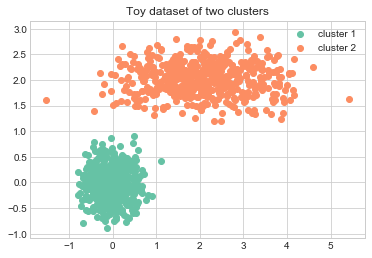

In [12]:
def get_toy_dataset(n_sample=500):
    c1_mean, c1_cov = [0, 0], [[0.1, 0], [0, 0.1]]
    c2_mean, c2_cov = [2, 2], [[1, 0],[0, 0.1]]

    c1 = np.random.multivariate_normal(c1_mean,c1_cov, n_sample)
    c2 = np.random.multivariate_normal(c2_mean,c2_cov, n_sample)
    dataset = np.concatenate([c1, c2], axis=0)
    return dataset

dataset = get_toy_dataset()
c1 = dataset[:500]
c2 = dataset[500:]

col = sns.color_palette('Paired', 2)
plt.scatter(c1[:,0], c1[:,1], c=col[0], label='cluster 1')
plt.scatter(c2[:,0], c2[:,1], c=col[1], label='cluster 2')
plt.title('Toy dataset of two clusters'); plt.legend(); plt.show()

In the example above, two clusters are discovered easily, however, in much higher dimensions (e.g. texts/images/health records), we cannot visualise them so easily, and we cannot tell whether they form cluster or not. Therefore, *Clustering algorithm attempts to fit clusters to data and helps us discover the underlying structure of the data*.

In this tutorial, we will implement **k-means** clustering ourselves and try to fit it to toy data.

# $k$-means Algorithm

- Given dataset of size $n$, the goal is to split them into $K$ disjoint clusters. $k$-means algorithm achieves this by discovering *$K$ centroids*, which means, the average locations for each data cluster. 
- The slogan for $k$-means is the following: **Out of all possible centroids, find the best centroids $\mu_1, \dots, \mu_K$ such that the average distances between all data points $x_1, \dots, x_n$ and their nearest centroid is the smallest.**
- This is solved using an algorithm called  *Expectation-Maximisation (EM) algorithm*: we will not bother with the formalism, but we will try to understand this method intuitively. 


- EM algorithm iteratively updates the estimate of the centroids which fits the data better and better everytime. The idea is to first initialise the centroids randomly. Then, we alternate between the following two steps: 
    - (Step 1) Find a cluster assignment for each data point based on current estimate of the centroids. In particular, for each point we compute the distances between the point and all the centroids. Then, we pick cluster $j$ that is the closest. We assign $j$ to the data point.
    - (Step 2) Update the centroid locations based on the newly assigned data points. In particular, for each cluster $j$, we compute a brand-new centroid location by simply taking the average of all the points in that cluster! We repeat this for all clusters $j = 1 \dots K$.
    
- The first step essentially splits the space based on the current estimate of the centroids. The second step updates the centroid location to fit the data even better. After a few iterations, the method will converge to a "stable" solution.   
- That's it! Let's Implement it.

# More Mathematical Introduction to $k$-means Algorithm

# WARNING: 

### If you are afraid of the equations, do not see this part. However, if you do appreciate more formal approach, then below might be for you. You can safely ignore this part and go straight to the implementation of $k$-means algorithm



- Given dataset $\mathcal{X} = \{x_1, x_2, \dots, x_n\}$, the goal is to split them into $K$ disjoint clusters. 
- In particular, for each data point $x_i$, we give it a cluster assignment $c_i \in \{1,\dots,K\}$. 
- In order to achieve this, $k$-means attempts to discover *$k$ centroids* (i.e. the mean points for each cluster), which are denoted $\{\mu_1, \dots, \mu_K \} = C$. 
- The *objective function* for $k$-means is therefore the following:

$$C = \arg\min_{C'} \sum_i^n \min_{\mu_j \in C'} \left( \| x_i - \mu_j \|^2 \right)$$

- which says: **find the centroids $\{\mu_1, \dots, \mu_K \}$ such that for all data point $x_i$, the distance between it and the nearest centroid is minimal.**


- This is solved using a special case of so called **Expectation-Maximisation (EM) algorithm**: it iteratively updates $C$ that fits data better. The idea is to alternate between two steps: (1) find cluster assignments for all data points based on current centroid (2) update the centroid based on the newly assigned points. The first step essentially partitions the space based on current estimate of the centroids. The second step updates the centroid to better fit the data. The method will converge to *local minimum* that works well in practice.  

- In concrete detail, the algorithm is the following:

Initialisation: randomly initialise the centroids $C = \{ \mu_1, \dots, \mu_k \}$.

**E-step**: For all $x_i$, we compute the distance to all centroids, i.e. $\|x_i - \mu_j \|^2$ for all $\mu_j \in C$. We then assign cluster label $c_i$ to $x_i$ in which $\mu_j$ has the smallest distance. (i.e. $\arg\min_j \|x_i - \mu_j \|^2$)


**M-step**: For each cluster, update the centroid based on new assignments:

$$\mu_j = \frac{1}{\left|S_j\right|} \sum_{x_i \in S_j} x_i, \quad \text{for } j = 1, \dots, K $$

where $S_j = \{x_i \in \mathcal{X} | c_i \equiv j \}$ (i.e. the set of all points assigned to cluster $j$)



# Exercise: Implement k-means algorithm


In below, fill in the blank to complete the implementation of k-means. You only need to implement two functions to make the algorithm work. Take your time, discuss with your neighbours if needed. You can use any library including numpy.

- Read and understand the **k_means(X, k, num_iter)** function. Explain to your neighbour what are the parameters and how the code works.
- **Exercise (1)** Implement function: **get_argmin_dist(distances)**
- **Exercise (2)** Implement function: **compute_mean(S_j)**



In [37]:
def get_argmin_dist(distances):
    min_index = np.argmin(distances)
    return min_index


    
def compute_mean(S_j):
    # S_j is a matrix with dimension N'xM where N' is the number of data points. 
    # It contains all data points that is assigned to cluster j.
    # Each data can be retrieved as S[1], S[2], ... and so on.
            
    # Compute the mean of S_j: 1/N' * (S[1] + S[2] + ... + S[N']) and return the result 
    return np.mean(S_j)

    # Corner case: if the list is empty, just return 0 for now.
    if len(S_j) == 0:
        return 0




In [53]:
def compute_distance(x, y):
    return np.linalg.norm(x - y)

def compute_loss(X, mu):
    N, M = X.shape
    k = len(mu)
    
    total_distance = 0
    for i in range(N):           
        distances = np.zeros(k)  
        for j in range(k):         
            distances[j] = compute_distance(X[i], mu[j])

        total_distance += np.min(distances)
    return total_distance

def k_means(X, k, num_iter=100):
    """
    Parameters
    ----------
    
    X: numpy array
        dataset represented as NxM matrix, where N is the number of data points and M is the dimension of the data. 
    
    k: int
        number of components used to fit the data
    
    num_iter: int
        number of iteration
    
    
    Returns
    -------
    
    mu - numpy array
       kxM matrix, which contains the computed centroids.
    
    assignments - numpy array
       N dimensional array which gives the cluster assignment for each data point
    
    """
    N, M = X.shape
    assignments = np.zeros(N)
    
    # initialise centroids
    mu = np.random.random(size=(k, M))
    
    for it in range(num_iter):
        ## Step 1: find the cluster assignment for each data point 

        # For each data point X[i], i = 1..N
        for i in range(N):           
            # We will temporally define a storage to keep track of the distances from X[i] to all centroids j = 1..k
            distances = np.zeros(k)  
            # For each centroid mu[j],  j = 1..k 
            for j in range(k):         
                # We compute distance between X[i] and the centroid mu[j]
                distances[j] = compute_distance(X[i], mu[j])
            
            # Out of 1, ..., k, find the index that has the smallest distance
            assignment = get_argmin_dist(distances)
            assignments[i] = assignment
        
        ## Step 2: update the centroids for each cluster
        
        # For each cluster j,  j = 1..k 
        for j in range(k):
            # Extract the data points in dataset X which is assigned to cluster j
            S_j = X[assignments == j]
            
            # Compute the average of S_j, which will be our new centroids
            mu[j] = compute_mean(S_j)
            
    return mu, assignments


def visualise_clusters(dataset, mu, assignments):
    plt.figure()
    k = len(mu)
    col = sns.color_palette('hls',len(mu))
    
    for j in range(k):
        cj_pred = dataset[assignments == j]
        plt.scatter(cj_pred[:,0], cj_pred[:,1], c=col[j], alpha=0.9)
        plt.scatter(mu[j,0], mu[j,1], c=col[j], edgecolors='black', label='cluster %d'%j)
        
    plt.legend()
    plt.title('k-means: Discovered Clusters')
    plt.show()

Once **get_argmin_dist(distances)** and **compute_mean(S_j)** are implemented correctly, you should be able to run $k$-means algorithm to cluster the dataset below. 

## Run $k$-means

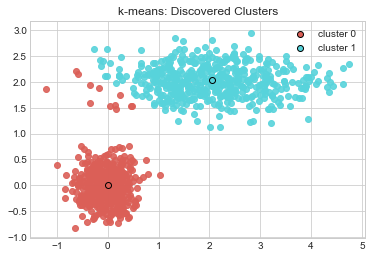

In [55]:
# create dataset 
dataset = get_toy_dataset()

# run k-means
mu, assignments = k_means(dataset, k=2, num_iter=10)

# visualise the result
visualise_clusters(dataset, mu, assignments)

Question (1) What do you observe? Did it behave as you expected?

Answer: $k$-means assumes each cluster has equal variance. In practice, this may not be the case, as we see for this dataset. However, $k$-means nevertheless is a simple, efficient and effective algorithm that is used a lot.

Question (2) You are given a function called **compute_loss(X, mu)**. This function computes *loss term $\mathcal{L}$*, which mesures how good the centroids are fitting the data X. Lower the better! 
- Run $k$-means with $k \in \{1,2,3,4,5\}$ and compute loss term $\mathcal{L}$ (use the code below). Which $k$ fits the best? We know that the true data only has 2 components. What does this mean?

Answer: **This is your Exercise (3)**

===== Running k-means with k=1 =====


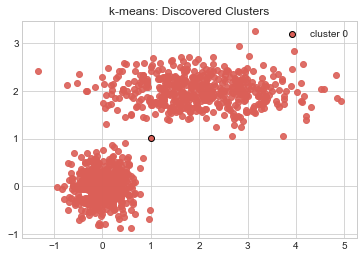

===== Running k-means with k=2 =====


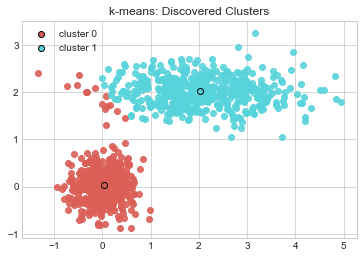

===== Running k-means with k=3 =====


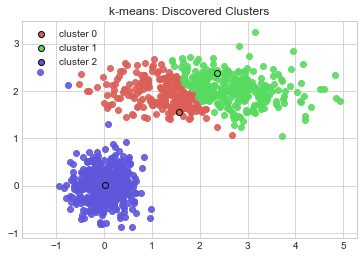

===== Running k-means with k=4 =====


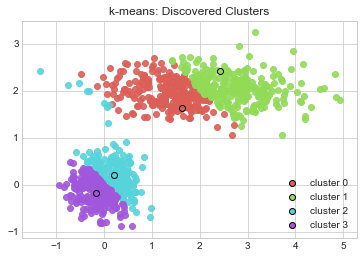

===== Running k-means with k=5 =====


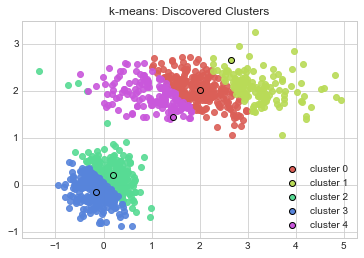

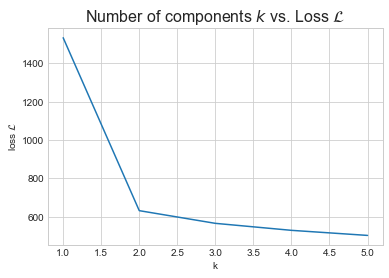

In [35]:
# create dataset 
dataset = get_toy_dataset()

ks = [1, 2, 3, 4, 5]
losses = []
for k in ks:
    print("===== Running k-means with k={} =====".format(k))

    # run k-means
    mu, assignments = k_means(dataset, k=k, num_iter=10)

    # compute loss
    loss = compute_loss(dataset, mu)
    
    # visualise the result
    visualise_clusters(dataset, mu, assignments)
    
    losses.append(loss)

# Plot results
plt.figure()
plt.plot(ks, losses)
plt.ylabel('loss $\mathcal{L}$'); plt.xlabel('k'); 
plt.title('Number of components $k$ vs. Loss $\mathcal{L}$', size=16)
plt.show()

# === End of Core Exercises ===

# Application: Clustering Digits 

In this section, we will apply the implemented algorithms to clustering slightly more challenging dataset, which is 8x8 pixels containing digits

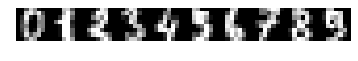

In [17]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# load and show data
np.random.seed(42)
digits = load_digits()
n_digits = len(np.unique(digits.target))
labels = digits.target

plt.imshow(np.hstack([digits.data[i].reshape(8,8) for i in range(10)]), cmap='gray'); plt.axis('off'); plt.show()

In [18]:
# normalise data
data = scale(digits.data)
n_samples, n_features = data.shape

# reduce the dimensionality via PCA (Dont worry about this!)
reduced_data = PCA(n_components=2).fit_transform(data)

Let's see how data is distributed

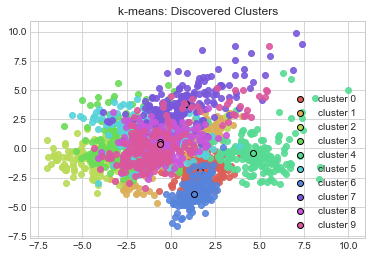

In [19]:
mu = []
for i in range(10):
    mu_i = np.mean(reduced_data[labels == i], axis=0)
    mu.append(mu_i)

mu = np.array(mu)
visualise_clusters(reduced_data, mu, labels)

Now apply your k-means

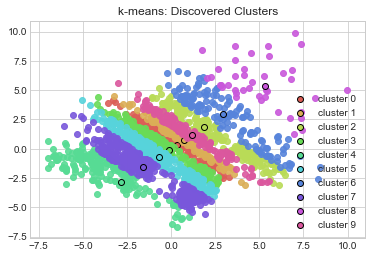

In [20]:
# run k-means
mu, assignments = k_means(reduced_data, k=10, num_iter=10)

# visualise the result
visualise_clusters(reduced_data, mu, assignments)

**Exercise (4)** (non-assessed): computing loss term $\mathcal{L}$ for different values of $k$. Do you observe something similar to what you saw above in the toy dataset? How would you choose $k$ in practise if the number of cluster is unknown? 

===== Running k-means with k=1 =====


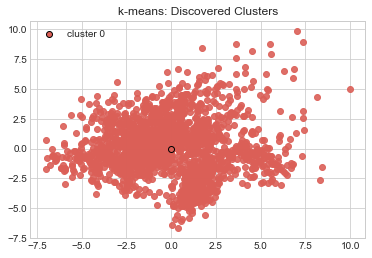

===== Running k-means with k=2 =====


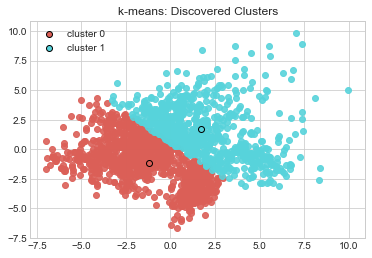

===== Running k-means with k=3 =====


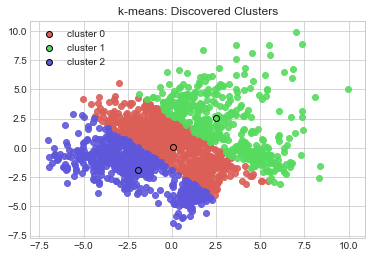

===== Running k-means with k=4 =====


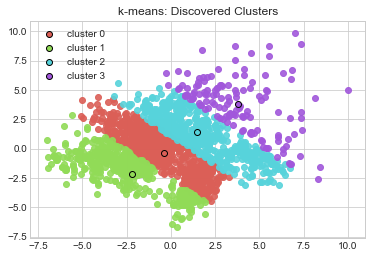

===== Running k-means with k=5 =====


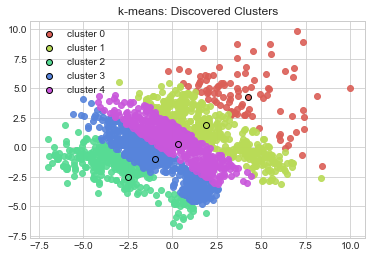

===== Running k-means with k=6 =====


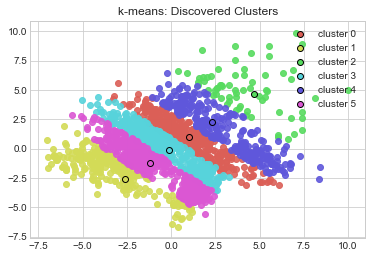

===== Running k-means with k=7 =====


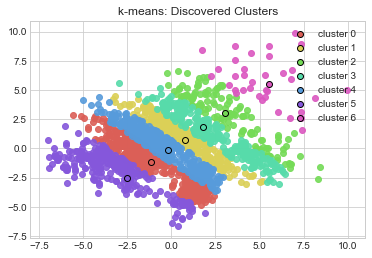

===== Running k-means with k=8 =====


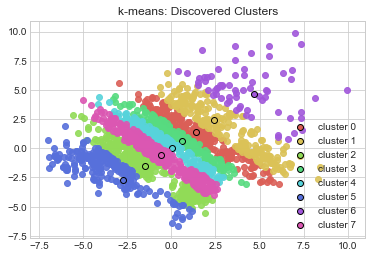

===== Running k-means with k=9 =====


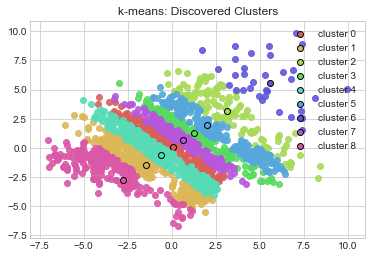

===== Running k-means with k=10 =====


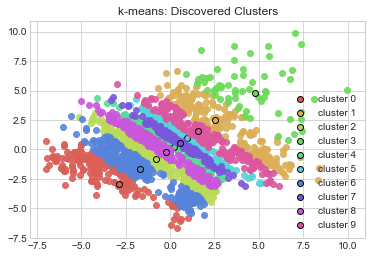

===== Running k-means with k=11 =====


/Users/ravi/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ravi/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ravi/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


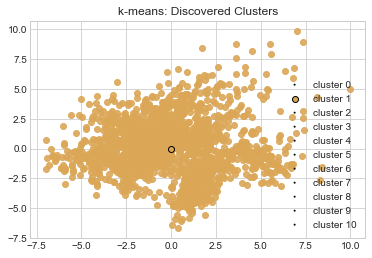

===== Running k-means with k=12 =====


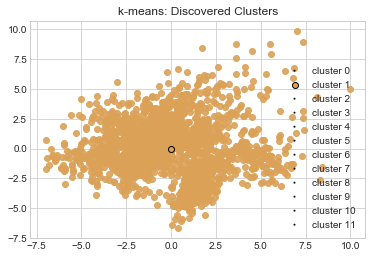

===== Running k-means with k=13 =====


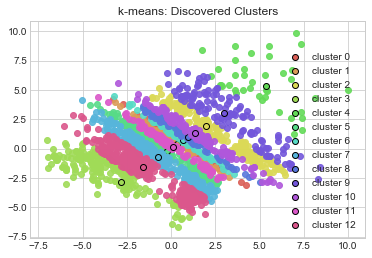

===== Running k-means with k=14 =====


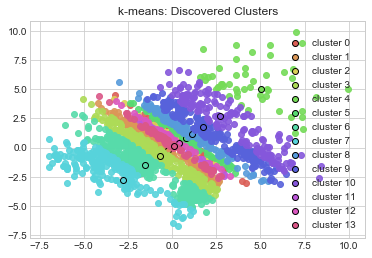

===== Running k-means with k=15 =====


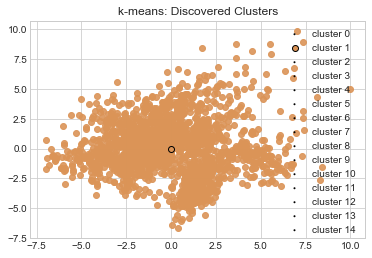

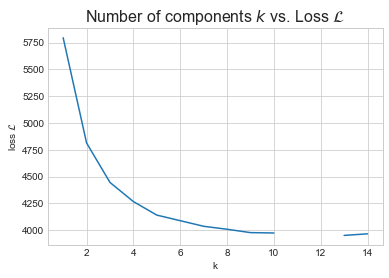

In [21]:
# create dataset 
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
losses = []
for k in ks:
    print("===== Running k-means with k={} =====".format(k))

    # run k-means
    mu, assignments = k_means(reduced_data, k=k, num_iter=10)

    # compute loss
    loss = compute_loss(reduced_data, mu)
    
    # visualise the result
    visualise_clusters(reduced_data, mu, assignments)
    
    losses.append(loss)

# Plot results
plt.figure()
plt.plot(ks, losses)
plt.ylabel('loss $\mathcal{L}$'); plt.xlabel('k'); 
plt.title('Number of components $k$ vs. Loss $\mathcal{L}$', size=16)
plt.show()